### **5. LSTM MODEL**

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Flatten
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
21/21 [==============================] - 9s 233ms/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2/50
21/21 [==============================] - 4s 193ms/step - loss: 3.9559e-04 - val_loss: 0.0017
Epoch 3/50
21/21 [==============================] - 4s 191ms/step - loss: 1.6100e-04 - val_loss: 0.0014
Epoch 4/50
21/21 [==============================] - 4s 191ms/step - loss: 1.2880e-04 - val_loss: 0.0015
Epoch 5/50
21/21 [==============================] - 4s 191ms/step - loss: 1.1463e-04 - val_loss: 0.0015
Epoch 6/50
21/21 [==============================] - 4s 195ms/step - loss: 1.1122e-04 - val_loss: 0.0014
Epoch 7/50
21/21 [==============================] - 4s 189ms/step - loss: 1.1239e-04 - val_loss: 0.0013
Epoch 8/50
21/21 [==============================] - 4s 192ms/step - loss: 1.0949e-04 - val_loss: 0.0012
Epoch 9/50
21/21 [==============================] - 4s 188ms/step - loss: 1.1045e-04 - val_loss: 0.0012
Epoch 10/50
21/21 [==============================] - 4s 189ms/step -

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print("TRAIN RMSE:", math.sqrt(mean_squared_error(y_train,train_predict)))

### Test Data RMSE
print("TEST RMSE:", math.sqrt(mean_squared_error(y_test,test_predict)))

TRAIN RMSE: 104.6258353988683
TEST RMSE: 237.12298845949982


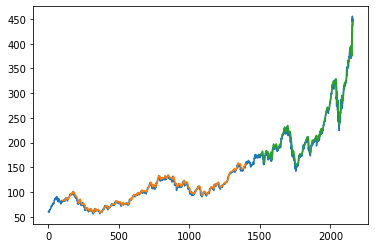

In [ ]:
### Plotting the actual versus the predicted Apple stock price values
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df_apple)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_apple)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_apple)-1, :] = test_predict
# plot baseline and predictions
plt.plot(df_apple)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

* The blue line in the graph indicates the actual data
* The orange graph indicates the train predict 
* The green graph indicates the test predict

In [ ]:
x_input=test_data[656:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        (len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[1.0233853]
1 day output [[1.0371361]]
2 day output [[1.0477033]]
3 day output [[1.0565381]]
4 day output [[1.0643027]]
5 day output [[1.0711967]]
6 day output [[1.0772058]]
7 day output [[1.0822499]]
8 day output [[1.0862601]]
9 day output [[1.0892029]]
10 day output [[1.0910836]]
11 day output [[1.0919381]]
12 day output [[1.0918217]]
13 day output [[1.090803]]
14 day output [[1.088955]]
15 day output [[1.0863537]]
16 day output [[1.0830749]]
17 day output [[1.0791941]]
18 day output [[1.0747837]]
19 day output [[1.0699153]]
20 day output [[1.064657]]
21 day output [[1.0590746]]
22 day output [[1.0532312]]
23 day output [[1.0471853]]
24 day output [[1.0409937]]
25 day output [[1.034708]]
26 day output [[1.0283769]]
27 day output [[1.0220453]]
28 day output [[1.0157546]]
29 day output [[1.0095412]]
[[1.0233852863311768], [1.0371360778808594], [1.0477032661437988], [1.0565381050109863], [1.064302682876587], [1.0711966753005981], [1.077205777168274], [1.0822498798370361], [1.08626008033

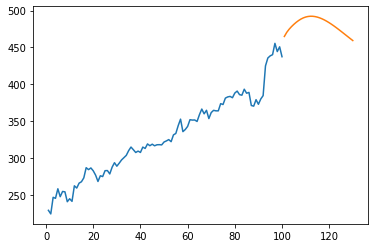

In [ ]:
# Prediction of future 30 days stock price data
import matplotlib.pyplot as plt
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

plt.plot(day_new,df_apple[2059:])
plt.plot(day_pred,scaler.inverse_transform(lst_output))


The orange line here shows the plot of the future 30 days prediction 

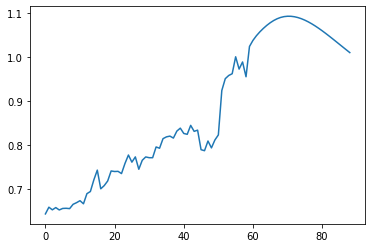

In [ ]:
# Extending the output to constantly fit the curve
df_3=df_price_scaled.tolist()
df_3.extend(lst_output)
plt.plot(df_3[2100:])


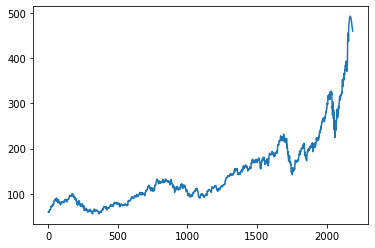

In [ ]:
# Predicted stock prices with the future 30 predicted days 
# More smooth curve mainly inverse transform
df_3=scaler.inverse_transform(df_3).tolist()
plt.plot(df_3)
